# 1. Introduction to Statistical learning

## 1.1 Work with data and EDA

**Pandas** - это библиотека Python, предоставляющая широкие возможности для анализа данных. С ее помощью очень удобно загружать, обрабатывать и анализировать табличные данные с помощью SQL-подобных запросов. В связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

Основными структурами данных в Pandas являются классы Series и DataFrame. Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Второй - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

**Рассмотрим объект типа DataFrame. Создадим свой DataFrame одним из способов.**

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame()
df['client'] = ['cl1', 'cl2', 'cl3', 'cl1', 'cl2', 'cl2', 'cl3']
df['year'] = [2020, 2020, 2020, 2018, 2018, 2019, 2019]
df['avg_salary'] = [80000, 60000, 70000, 60000, 40000, 50000, 60000]
df

,client,year,avg_salary
0,cl1,2020,80000
1,cl2,2020,60000
2,cl3,2020,70000
3,cl1,2018,60000
4,cl2,2018,40000
5,cl2,2019,50000
6,cl3,2019,60000


Раз pandas поддерживает sql - подобные запросы, то давайте сделаем один из них: выбере всех клиентов, у которых средняя годовая зарплата в 2020 больше 60000:

In [3]:
df[(df['year'] == 2020)&(df['avg_salary'] > 60000)]

,client,year,avg_salary
0,cl1,2020,80000
2,cl3,2020,70000


Тоже самое можно сделать и с помощью обычного синтаксиса sql с помощью библиотеки pandasql:

In [4]:
import pandasql as ps

ps.sqldf(
    '''
    SELECT *
    FROM df
    WHERE year = 2020 AND avg_salary > 60000
    '''
)

,client,year,avg_salary
0,cl1,2020,80000
1,cl3,2020,70000


Также pandas поддерживает простейшие графики, например:

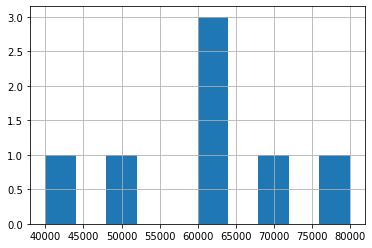

In [6]:
df['avg_salary'].hist()

## 1.1.1 Load data

В общем случае pandas является удобной библиотекой для табличных данных.
Данные мы загружаем с помощью функции read_csv() библиотеки pandas. Они записаны в файле Auto.csv.
Разберем основные параметры функции read_csv():

```python
pandas.read_csv(
    filepath_or_buffer, # задает путь к файлу
    sep=',', # задает символ - разделитель полей
    delimeter=',', # задает символ - разделитель полей
    header='infer', # задает номер строки, содержащей имена столбцов 
    names=None, # Задает список с именами столбцов
    index_col=None, # задает столбец, значения которого будут использоваться в качестве меток строк датафрейма
    usecols=None, # Задает подмножество столбцов
    squeeze=False, # Если спарсенные данные содержат лишь один столбец, возвращает объект Series
    decimal='.', # задает символ - десятичный разделитель (по умолчанию .)
    encoding=None # задает тип кодировки
)
```

Давайте загрузим данные из файла и начнем их анализировать:

In [7]:
df1 = pd.read_csv('Auto.csv')

In [8]:
# Смотрим на первые 5 строк

df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [9]:
# Смотрим на последние 5 строк

df1.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger
396,31.0,4,119.0,82.0,2720,19.4,82,1,chevy s-10


In [10]:
# Посмотрим на кол-во строк и столбцов

df1.shape

(397, 9)

In [11]:
# Можно посмотреть общую информацию - кол-во строк, столбцов, их наименование, типы, кол-во пропусков, примерный размер

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


## 1.1.2 Check NAs

In [12]:
# проверка заполненности ячеек

print('Всего записей: ', df1.shape[0])
df1.notna().sum()

Всего записей:  397


mpg             397
cylinders       397
displacement    397
horsepower      392
weight          397
acceleration    397
year            397
origin          397
name            397
dtype: int64

In [13]:
# Давайте выведем строки с пропущенными значениями horsepower

df1[df1['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


In [14]:
# Функция показывает сколько раз встречались значения в столбце и выводит в сортированном виде по убыванию

df1['year'].value_counts()

73    40
78    36
76    34
82    30
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: year, dtype: int64

## 1.1.3 Group by, aggregation

In [15]:
# Сделаем агрегирование по одному из столбцов

df1.groupby('cylinders').agg({'horsepower':'mean','weight':'mean'})

,horsepower,weight
cylinders,,
3,99.250000,2398.500000
4,78.281407,2304.546798
5,82.333333,3103.333333
6,101.506024,3198.226190
8,158.300971,4114.718447


In [16]:
# Чтобы дальше иметь возможность нормально обращаться к столбцам таблицы применим .reset_index()
# Можно также сортировать значения по интересующему столбцу

df1.groupby('cylinders').agg({'horsepower':'mean','weight':'mean'}).reset_index().sort_values('cylinders')

,cylinders,horsepower,weight
0,3,99.250000,2398.500000
1,4,78.281407,2304.546798
2,5,82.333333,3103.333333
3,6,101.506024,3198.226190
4,8,158.300971,4114.718447


In [17]:
# Можно также группировать срезы данных по какому-либо условию

df1[df1['year']<80].groupby('cylinders').agg({'horsepower':'mean','weight':'mean'}).reset_index().sort_values('cylinders')

,cylinders,horsepower,weight
0,3,99.000000,2391.333333
1,4,79.682171,2283.123077
2,5,90.000000,3180.000000
3,6,101.281690,3220.972222
4,8,158.823529,4118.539216


## 1.1.4 Merge 

Существует несколько типов слияний. 
- Left join - когда к таблице А присоединяются записи по общему для двух таблиц ключу из таблицы Б, при этом останутся все записи таблицы А, даже если ничего не присоединится из таблицы Б.
- Right join зеркальная копия left join
- Full outer join возвращает записи из обеих таблиц независимо от того, нашлись ли связки по соединяемому ключу
- Inner join возвращает только общие для двух таблиц записи по ключу

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html

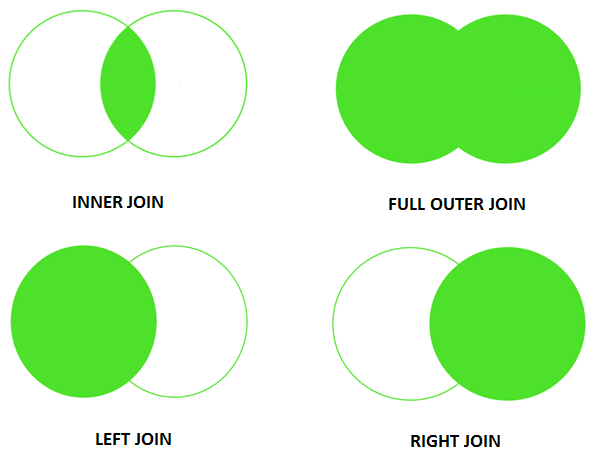

In [25]:
a = df1[['year','name', 'horsepower']]
b = df1[['cylinders', 'weight', 'year', 'name']]

In [26]:
a.head()

,year,name,horsepower
0,70,chevrolet chevelle malibu,130.0
1,70,buick skylark 320,165.0
2,70,plymouth satellite,150.0
3,70,amc rebel sst,150.0
4,70,ford torino,140.0


In [27]:
b.head()

,cylinders,weight,year,name
0,8,3504,70,chevrolet chevelle malibu
1,8,3693,70,buick skylark 320
2,8,3436,70,plymouth satellite
3,8,3433,70,amc rebel sst
4,8,3449,70,ford torino


In [30]:
# Можем производить слияние по некольким полям
c = a.merge(b, on=['name','year'], how='inner')
c.head()

,year,name,horsepower,cylinders,weight
0,70,chevrolet chevelle malibu,130.0,8,3504
1,70,buick skylark 320,165.0,8,3693
2,70,plymouth satellite,150.0,8,3436
3,70,amc rebel sst,150.0,8,3433
4,70,ford torino,140.0,8,3449


In [32]:
c[c['name']=='chevrolet chevelle malibu']

,year,name,horsepower,cylinders,weight
0,70,chevrolet chevelle malibu,130.0,8,3504
35,71,chevrolet chevelle malibu,100.0,6,3329


In [31]:
df1[df1['name']=='chevrolet chevelle malibu']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
35,17.0,6,250.0,100.0,3329,15.5,71,1,chevrolet chevelle malibu


##  1.1.5 Save as excel

In [18]:
# Существуют разные функции сохранения датафреймов в excel-форматы. 
# Например, можно сохранить датафрейм в csv с помощью функции DataFrame.to_csv('file_name.csv')
# Функции имеют множество изменяемых параметров, таих как сепаратор или кодировка. Подробнее можете узнать в документации

df.to_excel('df.xlsx')

Полезным будет также изучить qcut, однако, в рамках данного курса его применение маловероятно

## 2 Charts with matplotlib

In [33]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df2 = df1.groupby('cylinders').agg({'horsepower':'mean','weight':'mean'}).reset_index().sort_values('cylinders')

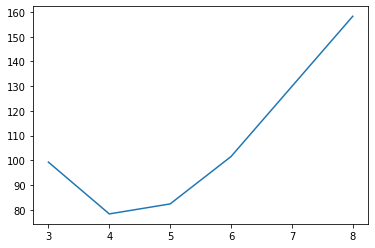

In [35]:
# Простые графики можно построить одной командой, однако в таком виде их можно использовать только для своих целей.

plt.plot(df2['cylinders'], df2['horsepower'])

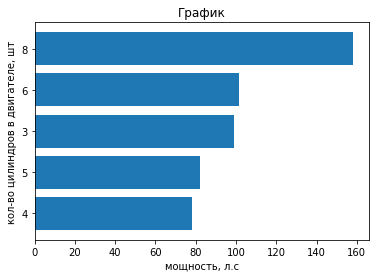

In [36]:
# Уже лучше, на графиках, которые предполагаются к показу должны быть подписаны оси, заголовок, график должен
# быть хорошо читаемым и логичным

df2=df2.sort_values('horsepower')
plt.barh(df2['cylinders'].astype('str'), df2['horsepower'])
plt.xlabel('мощность, л.с')
plt.ylabel('кол-во цилиндров в двигателе, шт')
plt.title('График')
plt.show()

In [37]:
df1['year_cat'] = pd.qcut(df1['year'],3)

In [38]:
df3 = df1.groupby(['cylinders','year_cat']).agg({'horsepower':'mean','weight':'mean'}).reset_index().sort_values('cylinders')

In [39]:
df3

,cylinders,year_cat,horsepower,weight
0,3,"(69.999, 74.0]",93.500000,2227.000000
1,3,"(74.0, 78.0]",110.000000,2720.000000
2,3,"(78.0, 82.0]",100.000000,2420.000000
3,4,"(69.999, 74.0]",80.661017,2235.483333
4,4,"(74.0, 78.0]",79.500000,2317.000000
5,4,"(78.0, 82.0]",75.707317,2344.800000
6,5,"(69.999, 74.0]",NaN,NaN
7,5,"(74.0, 78.0]",103.000000,2830.000000
8,5,"(78.0, 82.0]",72.000000,3240.000000
9,6,"(69.999, 74.0]",99.423077,3066.444444


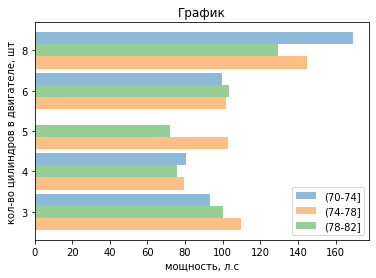

In [40]:
# Инструменты matplotlib позволяют всячески изменять график - цвета, линии, маркеры, толщина объектов, прозрачность, 
# подписи, шрифты, цветовые палитры, выделения, использование двух вертикальных осей и многое другое

x = np.arange(len(df3['cylinders'].unique()))
plt.barh(y=x+0.3, height=0.3,
         width=df3[df3['year_cat']==df3['year_cat'].unique()[0]]['horsepower'], alpha=0.5, label='(70-74]')
plt.barh(y=x-0.3, height=0.3,
         width=df3[df3['year_cat']==df3['year_cat'].unique()[1]]['horsepower'], alpha=0.5, label='(74-78]')
plt.barh(y=x, height=0.3, 
         width=df3[df3['year_cat']==df3['year_cat'].unique()[2]]['horsepower'], alpha=0.5, label='(78-82]')
plt.legend()
plt.yticks(x, df3['cylinders'].unique())
plt.xlabel('мощность, л.с')
plt.ylabel('кол-во цилиндров в двигателе, шт')
plt.title('График')
plt.show()

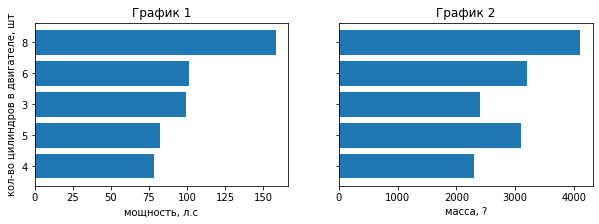

In [41]:
# Можно также строить несколько графиков в одном, соединять их оси,
# изменять между ними расстояние, делать общие заголовки и прочее
# Графики также можно сохранять. В формате png например

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize=(10, 3))


df2=df2.sort_values('horsepower')
ax1.barh(df2['cylinders'].astype('str'), df2['horsepower'])
ax1.set_xlabel('мощность, л.с')
ax1.set_ylabel('кол-во цилиндров в двигателе, шт')
ax1.set_title('График 1')

ax2.barh(df2['cylinders'].astype('str'), df2['weight'])
ax2.set_xlabel('масса, ?')
#ax2.set_ylabel('кол-во цилиндров в двигателе, шт')
ax2.set_title('График 2')

plt.show()

Существуют и более продвинутые библиотеки для рисования графиков, например seaborn или pyplot. Последний поддерживает анимацию и может использоваться для построения интерактивных дэшбордов